In [18]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import pandas as pd

# Load your local file
df = pd.read_csv('customer_reviews.csv')

# Preview the dataset
print(df.head())


           I love this product, it's amazing!  Positive
0      This is the worst thing I ever bought.  Negative
1    Totally worth the money, very satisfied.  Positive
2  Horrible experience, will never buy again.  Negative
3    Excellent quality and fantastic support.  Positive
4              Not good, broke after one use.  Negative


In [6]:
print(df.sample(5))  # Randomly shows 5 rows


           I love this product, it's amazing!  Positive
0      This is the worst thing I ever bought.  Negative
4              Not good, broke after one use.  Negative
3    Excellent quality and fantastic support.  Positive
7            Very comfortable and works well.  Positive
2  Horrible experience, will never buy again.  Negative


In [7]:
print(df.columns)


Index(['I love this product, it's amazing!', 'Positive'], dtype='object')


In [9]:
# Load CSV while manually setting column names
df = pd.read_csv('customer_reviews.csv', names=['Review', 'Sentiment'], skiprows=1)

print(df.head())


                                       Review Sentiment
0          I love this product, it's amazing!  Positive
1      This is the worst thing I ever bought.  Negative
2    Totally worth the money, very satisfied.  Positive
3  Horrible experience, will never buy again.  Negative
4    Excellent quality and fantastic support.  Positive


In [10]:
# Convert sentiment to numeric labels
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

print(df.head())


                                       Review  Sentiment
0          I love this product, it's amazing!          1
1      This is the worst thing I ever bought.          0
2    Totally worth the money, very satisfied.          1
3  Horrible experience, will never buy again.          0
4    Excellent quality and fantastic support.          1


In [11]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    words = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
df['Clean_Review'] = df['Review'].apply(preprocess)

# Check cleaned data
print(df[['Review', 'Clean_Review']].head())


                                       Review  \
0          I love this product, it's amazing!   
1      This is the worst thing I ever bought.   
2    Totally worth the money, very satisfied.   
3  Horrible experience, will never buy again.   
4    Excellent quality and fantastic support.   

                          Clean_Review  
0                 love product amazing  
1              worst thing ever bought  
2        totally worth money satisfied  
3        horrible experience never buy  
4  excellent quality fantastic support  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=500)  # You can change max_features for more/less words
X = tfidf.fit_transform(df['Clean_Review']).toarray()

# Target variable
y = df['Sentiment']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\satwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\satwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\satwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

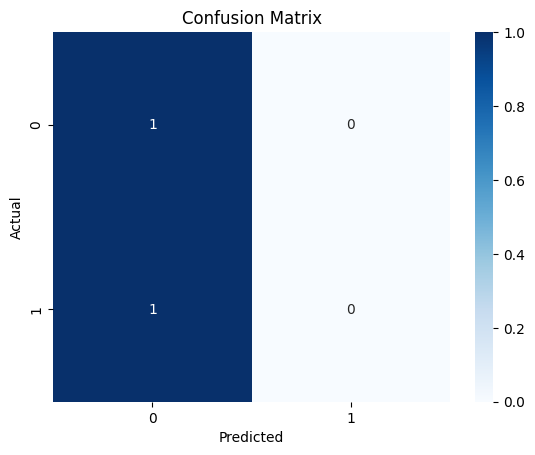

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
